## DIGITAL IMAGE PROCESSING IN THE SPATIAL-SPATIAL/FREQUENCY DOMAIN

### VON MISES DISTRIBUTION OF IMAGE ENTROPY



**@author: Salvador Gabarda**

salvador@optica.csic.es

This notebook includes Python functions for digital image processing based on the Wigner distribution.

Detailed information about this subject may be found in 

https://www.osapublishing.org/josaa/abstract.cfm?uri=josaa-29-10-2058

https://www.researchgate.net/publication/321544037_Texture_classification_and_retrieval_through_space-frequency_histograms


Created on Jan  2  2018, reviewed Dec 27 2019




**Frequency histograms analysis based on the 1D local-directional Wigner distribution** 

A family of frequency histogram may be computed from the Wigner distribution. They can be used to build image features useful for e.g.: texture characterization. 

In [1]:
# import modules
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.fftpack import fft, ifft
import math
from scipy import signal
import matplotlib.mlab as mlab
import pandas as pd
from scipy import special
import matplotlib.patches as mpatches
#import sys  
#sys.path.insert(0, 'C:/Users/User/Python/External')
import sgtools as sgt
import os
os.path
cwd = os.getcwd()
print(cwd) 



/home/nbuser/library


In [2]:
pd.options.display.max_rows = 14

**Test image** 

We input a test image for analysis ...


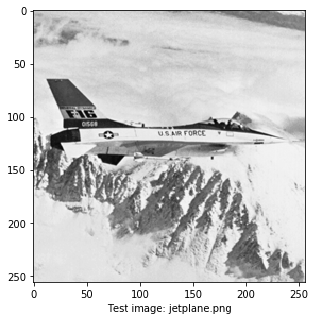

In [3]:
name = 'jetplane.png'
image_name = '' + name
input_image = mpimg.imread(image_name) 
image_dimension = len(input_image.shape)
if image_dimension == 3:
    test_image = (1/3)*(input_image[:,:,0]+
                      input_image[:,:,1]+input_image[:,:,2])
else:
    test_image = input_image
    
# convert image to regular gray levels 
test_image =np.uint8(255*test_image)    

# show image version to be processed 
plt.figure(figsize =(5,5))
plt.imshow(test_image, cmap='gray')
plt.xlabel("Test image: " + name)
plt.show()

**Wigner distribution** 

... and we calculate its 1-D pseudo-Wigner distribution as explained in S. Gabarda, G. Cristóbal, "Blind image quality assessment through anisotropy", JOSA A, 2007


**The histogram of image frequencies** 

When frequencies are rescaled to values in the range 0 to 255, they can be represented as images as shown above. They may be used to  build histograms of such frequencies of the Wigner distribution of the image.

**Histograms** 

Considering the set of discrete frequencies used to calculate the PWD of the image, we get a set of frequency histograms. 
Histograms can be shown as below.

**Data** 

The frequency histograms can be stored as a single line of code for future analysis

**Multi-directional analysis** 

Considering the set of discrete frequencies used to calculate the PWD of the image, we get a set of frequency histograms 

**Number of directions** 

For different orientations we obtain different frequency histograms and different values of entropy. However, for the directional features in the image to be comparable it is required that the number of pixels per unit of length be equal. When working with square windows, this is only possible when using the angles in degrees 22.5, 67.5, 112.5 and 157.5. The remaining directions in between have to be estimated by an appropriate distribution, e.g., the von Mises distribution.

In [4]:
seq_length = 9
times = 4
origin = 22.5
multi_entropy = sgt.times_values_entropy(times,origin,test_image,seq_length)


In [5]:
multi_entropy


array([0.09663547, 0.09850702, 0.10352729, 0.09724015])

**Data** 

The above data has been also stored in a dataframe as follows

**Main direction** 

The image texture can be oriented by selecting one of the directions as prime, based on its maximum image entropy. From the four measured orientations we can estimate a full range of orientations by approximating the values of entropy to a von Mises angular distribution. Here below the key four points to build the von Mises distribution are shown.

The values of the parameters $\kappa$ and $\mu$ of the von Mises distribution are approximated here by method based on the gradient descent algorithm. A initial approximation is found by the following algorithm due to Feng (for mu) and Dhillon (for kappa).

We first determine the initial approximation to the solution

In [6]:
mu,kappa = sgt.initial_estimation(multi_entropy)
S,P,AB = sgt.error_eval(kappa,mu,multi_entropy)
print('initial error = %.4f' % S)


initial error = 0.0022


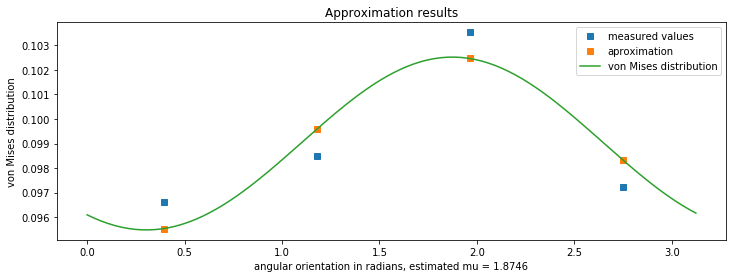

mu  = 1.8746 mu in degrees = 107.4045 kappa = 0.5549 error = 0.0022


In [7]:
# PLOT
alpha = math.pi/8
theta = np.array([alpha, 3*alpha, 5*alpha, 7*alpha])
Ik = special.i0(kappa) 
thetax = np.arange(0,math.pi,math.pi/180)
sequence = (1/(2*math.pi*Ik))*np.cosh(kappa*np.cos(thetax - mu))
sequencex = np.multiply(AB[0,0],sequence) + AB[1,0]


fig = plt.figure(figsize = (12,4))
ax = plt.subplot(111)

ax.plot(theta, multi_entropy,'s', label='measured values')
ax.plot(theta, P,'s' , label='aproximation')
ax.plot(thetax, sequencex, label='von Mises distribution')



plt.title('Approximation results')
ax.legend()

msg = msg = 'estimated mu = %.4f' % mu
msg = 'angular orientation in radians, ' + msg
plt.xlabel(msg)
plt.ylabel('von Mises distribution')

plt.show()

# estimation in degrees
mu_degrees = math.degrees(mu)
print('mu  = %.4f' % mu,'mu in degrees = %.4f' % mu_degrees,'kappa = %.4f' % kappa,'error = %.4f' % S )


Once we know the angular orientation $\mu$ of the von Mises distribution, we calculate the entropy of the image in such direction

In [11]:
seq_length = 9
times = 1
origin = mu_degrees
mu_entropy = sgt.times_values_entropy(times,origin,test_image,seq_length)
print('the entropy of image ',name,' in  mu direction is ',np.round(mu_entropy,4))

the entropy of image  jetplane.png  in  mu direction is  0.0981
